# Movie Ratings


## Table of Contents
   1. Introduction
   2. Data Preparation and Cleaning
   3. Exploratory Analysis and Visualization
   4. Asking and Answering Questions
   5. Inferences and Conclusion
    
## Introduction    

In this project, I will analyze Ratings and reviews for 15,000+ movies reviewed by Rotten Tomatoes.

Each record includes film details (title, description, rating, genre, directors, cast, release date, studio, runtime, etc.), 
as well as featured reviews, "Tomatometer" status, and audience ratings.

#### Explanation of rating category:

- PG: Parental Guidance Suggested, Some Material May Not Be Suitable for Children.
- R: Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian.
- NR: If a film has not been submitted for a rating or is an uncut version of a film that was submitted
- G: General Audiences, All Ages Admitted.
- PG-13: Parents Strongly Cautioned, Some Material May Be Inappropriate for Children Under 13.
- NC-17: No One 17 and Under Admitted.

    https://www.canr.msu.edu/news/what_do_movie_ratings_mean
    
    https://www.atlascinemas.net/ratings.html

#### What is a genre in a movie?
   - A film genre is a motion-picture category based (for example) on similarities either in the narrative elements or in the emotional response to the film (namely: serious, comic, etc.). ... Each film genre is associated with "conventions, iconography, settings, narratives, characters and actors".
    https://en.wikipedia.org/wiki/Film_genre

I have taken data from this link for analysis movie ratings. 
    https://www.mavenanalytics.io/data-playground



## Recommended Analysis

 1. Most popular movies by audience watch?
 2. which year maximum movies were released in treaters. 
 3. which month maximum movies were released in treaters.
 4. What does the distribution of films look like by rating
 5. What % of films received a Certified Fresh Tomatometer rating? What about Rotten?
 6. What the trend between audience vote count against audience ratings? 
 7. how many genres category we have ?
 8. Which genres are the most common (number of movies made)?
 9. Which genres have high audience voting?
 10. Which genres have high number of movies with an voting avg. >=80?
 11. Compare average Tomatometer ratings by Studio. Which studios produce the highest rated films, on average? The lowest?
 12. Compare the Tomatometer ratings against audience ratings. Which films showed the largest discrepancies between audiences and critics?
    
   
   I have used NumPy, pandas and metplotlib libraries to do Exploratory Analysis and Visualization in this project.


   Data Analysis with Python: Zero to Pandas” course is practical, beginner-friendly and coding-focused, i have learned an introduction to data analysis covering the basics of Python, Numpy, Pandas, data visualization and exploratory data analysis in details and short period. you can get an environment to practice and assignment to learn and practice your skills 

   Please click here for more details about the course. [the course](http://zerotopandas.com),


In [1]:
project_name = "rotten-tomatoes-movie-ratings-analysis" # change this

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "amir-ahmadabadi786/rotten-tomatoes-movie-ratings-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/amir-ahmadabadi786/rotten-tomatoes-movie-ratings-analysis


'https://jovian.ml/amir-ahmadabadi786/rotten-tomatoes-movie-ratings-analysis'

## Data Preparation and Cleaning

In [5]:
#import libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# Import Movies Dataset
dfMovies = pd.read_csv("Rotten Tomatoes Movies.csv",sep=",",header='infer',engine='python')


In [7]:
dfMovies.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0,68860.0


#### Genres are separated with ",". I will need to split this column.

### Data Cleaning

- Checking null value and drop those rows
- Checking for and dropping of duplicates
- Only keep columns that are needed for analysis
- Split genres

In [8]:
dfMovies.shape

(16638, 17)

In [9]:
# Drop duplicates
dfMovies.drop_duplicates(inplace=True)
# Check if done (-1 entry)
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16637 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16637 non-null  object 
 1   movie_info          16613 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16637 non-null  object 
 4   genre               16620 non-null  object 
 5   directors           16523 non-null  object 
 6   writers             15288 non-null  object 
 7   cast                16353 non-null  object 
 8   in_theaters_date    15822 non-null  object 
 9   on_streaming_date   16635 non-null  object 
 10  runtime_in_minutes  16482 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16637 non-null  object 
 13  tomatometer_rating  16637 non-null  int64  
 14  tomatometer_count   16637 non-null  int64  
 15  audience_rating     16385 non-null  float64
 16  audi

In [10]:
dfMovies.shape

(16637, 17)

In [11]:
dfMovies.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0,68860.0


In [12]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16637 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16637 non-null  object 
 1   movie_info          16613 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16637 non-null  object 
 4   genre               16620 non-null  object 
 5   directors           16523 non-null  object 
 6   writers             15288 non-null  object 
 7   cast                16353 non-null  object 
 8   in_theaters_date    15822 non-null  object 
 9   on_streaming_date   16635 non-null  object 
 10  runtime_in_minutes  16482 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16637 non-null  object 
 13  tomatometer_rating  16637 non-null  int64  
 14  tomatometer_count   16637 non-null  int64  
 15  audience_rating     16385 non-null  float64
 16  audi

Almost all variables I need for my analysis have no null entries. Only for genres have 17, in_theaters_date have 815 , studio_name have 416 and audience_rating have 252 null entries. In the next step I will first drop the null entries for genres,in_theaters_date, studio_name & audience_rating and then only keep columns that I need for my further analysis. 

In [13]:
# drop value which are empty in 'genre','in_theaters_date','audience_rating', 'studio_name'
dfMovies.dropna(subset = ["genre",'in_theaters_date','audience_rating', 'studio_name'], inplace=True)

In [14]:
dfMovies.shape

(15391, 17)

In [15]:
# Only keep columns that are needed for further analysis using movie title as index
md = dfMovies[['movie_title','rating','genre', 'in_theaters_date','studio_name', 'tomatometer_status','tomatometer_rating','tomatometer_count','audience_rating','audience_count']]
# md.set_index('movie_title', inplace=True)

In [16]:
# Split genres and create a new entry for each of the genre a movie falls into
s = md['genre'].str.split(', ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
del md['genre']
md_split_genres = md.join(s)

In [17]:
# Check result
md_split_genres.head()

,movie_title,rating,in_theaters_date,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,genre
0,Percy Jackson & the Olympians: The Lightning T...,PG,12-02-2010,20th Century Fox,Rotten,49,144,53.0,254287.0,Action & Adventure
0,Percy Jackson & the Olympians: The Lightning T...,PG,12-02-2010,20th Century Fox,Rotten,49,144,53.0,254287.0,Comedy
0,Percy Jackson & the Olympians: The Lightning T...,PG,12-02-2010,20th Century Fox,Rotten,49,144,53.0,254287.0,Drama
0,Percy Jackson & the Olympians: The Lightning T...,PG,12-02-2010,20th Century Fox,Rotten,49,144,53.0,254287.0,Science Fiction & Fantasy
1,Please Give,R,30-04-2010,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,Comedy


In [18]:
# Check entries (should be a lot more rows since the most movies have more than one genre)
md_split_genres.shape

(34800, 10)

Now the data is ready for exploratory analysis.

## Exploratory Analysis and Visualization

### Explore Data
* Distribution of variables
* Recommended Analysis

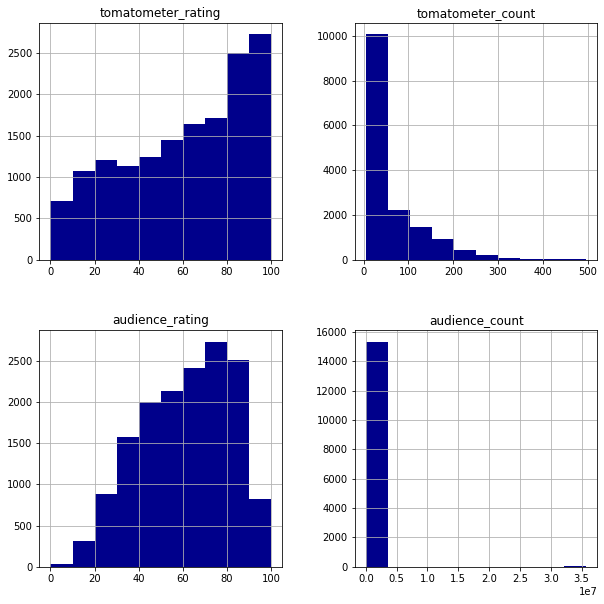

In [19]:
# Look at histograms to get idea of how variables are distrubuted (overall)
md.hist(color='DarkBlue',figsize= (10,10));

All variables are skewed. The only variable that is closed to a normal distribution is audience_rating. (slightly right skewed).

In [20]:
# Group data by genre and get mean for each genre and each variable
md_genre_mean = md_split_genres.groupby(['genre']).mean()

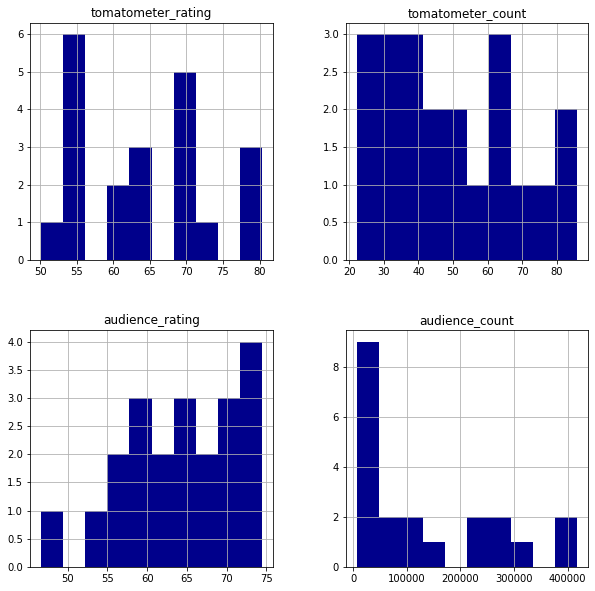

In [21]:
# Get distribution of mean of variables grouped by genre
md_genre_mean.hist(color='DarkBlue',figsize= (10,10));

All means of variables per genre are skewed. Mean of runtime across genres is closest to being normally distributed.

In [22]:
# Overall Descriptive statistics
md.describe()

,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,15391.000000,15391.000000,15391.000000,1.539100e+04
mean,60.001364,59.949191,60.670002,1.621809e+05
std,28.562894,67.705557,20.394700,1.875162e+06
min,0.000000,5.000000,0.000000,5.000000e+00
25%,37.000000,13.000000,45.000000,1.060000e+03
50%,65.000000,31.000000,63.000000,5.588000e+03
75%,85.000000,84.000000,78.000000,3.328600e+04
max,100.000000,497.000000,100.000000,3.579764e+07


The most popular movie was 'Titanic', 'The Lord of the Rings: The Return of the King' & 'Spider-Man'.

In [23]:
md_split_genres['release_year'] = pd.DatetimeIndex(md_split_genres['in_theaters_date']).year
md_split_genres['release_month'] = pd.DatetimeIndex(md_split_genres['in_theaters_date']).month

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "amir-ahmadabadi786/rotten-tomatoes-movie-ratings-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/amir-ahmadabadi786/rotten-tomatoes-movie-ratings-analysis


'https://jovian.ml/amir-ahmadabadi786/rotten-tomatoes-movie-ratings-analysis'

## Asking and Answering Questions



### Q1. Most popular movies by audience watch?

In [26]:
dfMovies.nlargest(3, 'audience_count')

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
15315,Titanic,This spectacular epic re-creates the ill-fated...,A mostly unqualified triumph for James Cameron...,PG-13,"Drama, Romance",James Cameron,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",19-12-1997,10-09-2012,194.0,Paramount Pictures,Certified Fresh,89,189,69.0,35797635.0
14506,The Lord of the Rings: The Return of the King,The final battle for Middle-earth begins. Frod...,Visually breathtaking and emotionally powerful...,PG-13,"Action & Adventure, Classics, Science Fiction ...",Peter Jackson,"Fran Walsh, Philippa Boyens, Peter Jackson","Elijah Wood, Sean Astin, Ian McKellen, Andy Se...",17-12-2003,25-05-2004,201.0,New Line Cinema,Certified Fresh,93,273,86.0,34679773.0
12924,Spider-Man,After incorporating elements of comic book sty...,Not only does Spider-Man provide a good dose o...,PG-13,"Action & Adventure, Mystery & Suspense, Scienc...",Sam Raimi,David Koepp,"Tobey Maguire, Kirsten Dunst, Willem Dafoe, Ja...",03-05-2002,01-11-2002,121.0,Columbia Pictures,Certified Fresh,90,243,67.0,34297354.0


The most popular movie was Titanic ,The Lord of the Rings: The Return of the King & Spider-Man.

### Q2 . which year maximum movies were released in treaters. 

In [27]:
# Get movies made per year, create new data frame
md_year = pd.DataFrame(md_split_genres.groupby(['release_year']).movie_title.nunique())
md_year.head()

,movie_title
release_year,
1914,1
1915,2
1916,1
1919,1
1920,5


In [28]:
# Get max of movies made per year
md_year.nlargest(5,'movie_title')

,movie_title
release_year,
2014,728
2013,691
2012,661
2015,615
2011,595


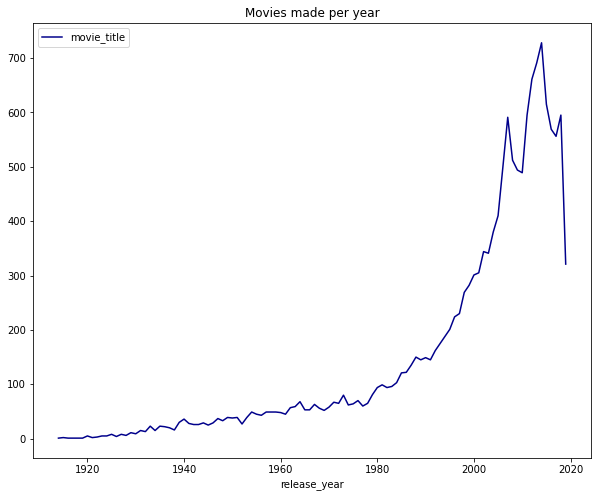

In [29]:
# Plot data, line chart for showing development over the years
md_year.plot.line(title = 'Movies made per year',color='DarkBlue',figsize=(10, 8));

In this graph we see that over time more and more movies were released in treaters per year. Starting at just 1 movies in 1914 up to 321 per year in 2019 with a max of 728 movies in 2014.


### Q3. which month maximum movies were released in treaters.

In [30]:
# Get movies made per month, create new data frame
md_month = pd.DataFrame(md_split_genres.groupby(['release_month']).movie_title.nunique())
md_month.head(12)

,movie_title
release_month,
1,2332
2,918
3,1181
4,1146
5,1032
6,1191
7,1159
8,1262
9,1299


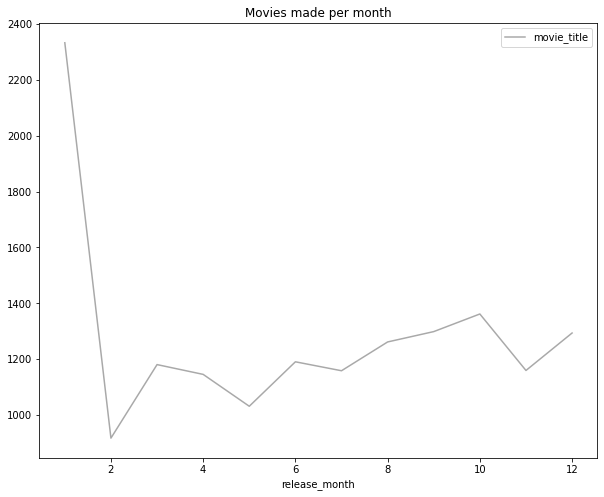

In [31]:
# Plot data, line chart for showing development over the years
md_month.plot.line(title = 'Movies made per month',color='Darkgray',figsize=(10, 8));

In this graph we see that maximum movies were released in January month. lowest 918 movies in February and max of 2332 movies in January.

### Q4. What does the distribution of films look like by rating?

In [32]:
# find unique values
dfMovies['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'PG-13)', 'NC17', 'R)'],
      dtype=object)

In [33]:
# repalce simliar value 
dfMovies['rating'].replace({'PG-13)': 'PG-13', 'R)': 'R'}, inplace=True)

In [34]:
dfMovies['rating'].value_counts()

R        5916
NR       4006
PG-13    2822
PG       1985
G         628
NC17       34
Name: rating, dtype: int64

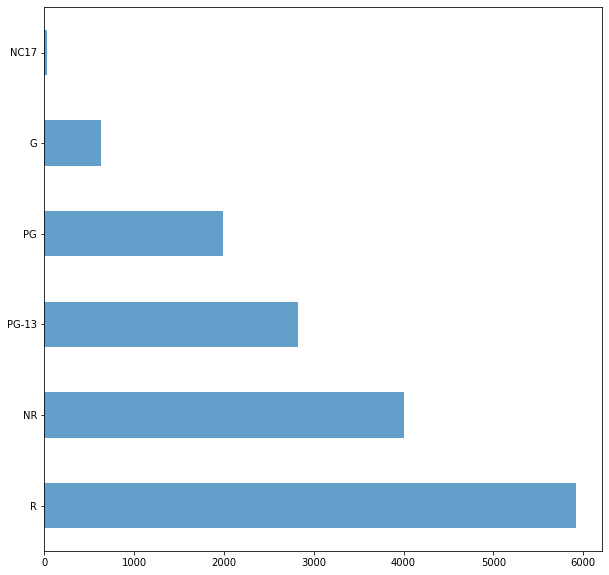

In [35]:
#Visualize movie distribution by rating
dfMovies['rating'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

In this graph we see that majority movies were rated in Restricted catagory (Children Under 17 Require Accompanying Parent or Adult Guardian) and less movies are rated in General category(General Audiences, All Ages Admitted).

lowest 628 movies in general category and max of 5916 movies in Restricted category.

### Q5. What % of films received a Certified Fresh Tomatometer rating? What about Rotten?

In [36]:
# Group movies by genre using title as unique identifier and display all genres.
md_Tomatometer_rating = (pd.DataFrame(dfMovies.groupby('tomatometer_status').movie_title.nunique())).sort_values('movie_title', ascending=False)
md_Tomatometer_rating.head(3)

,movie_title
tomatometer_status,
Rotten,6705
Fresh,5614
Certified Fresh,2890


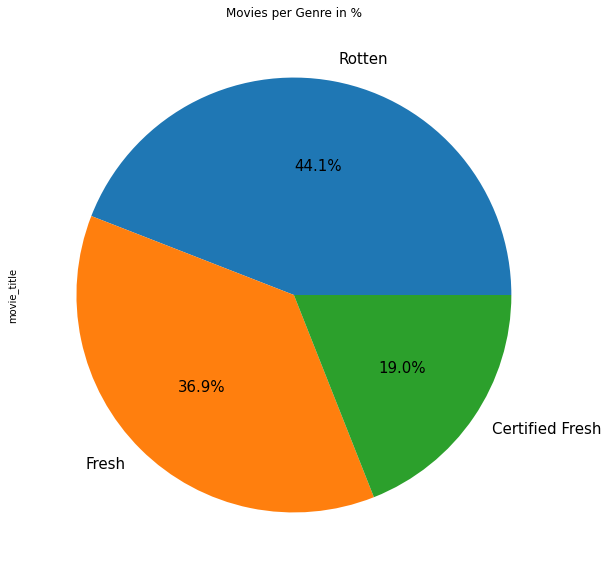

In [37]:
md_Tomatometer_rating['movie_title'].plot.pie(title= 'Movies per Genre in %', figsize=(10,10), autopct='%1.1f%%',fontsize=15);


In the above graph we can see that the 19% of films received a Certified Fresh Tomatometer rating and  44.1%  are consider Rotten

### Q6. What the trend between audience vote count against audience ratings? 

In [38]:
# Get mean of variables grouped by year (new data frame) in order to see what changed
md_year_mean = md_split_genres.groupby('release_year').mean()

In [39]:
# Check results
md_year_mean.head()

,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_month
release_year,,,,,
1914,100.000000,8.000000,69.000000,1151.000000,1.000000
1915,89.000000,23.000000,56.000000,2987.500000,2.000000
1916,97.000000,36.000000,77.000000,4894.000000,5.000000
1919,95.000000,22.000000,71.000000,3798.000000,5.000000
1920,92.631579,20.789474,80.052632,8852.421053,2.315789


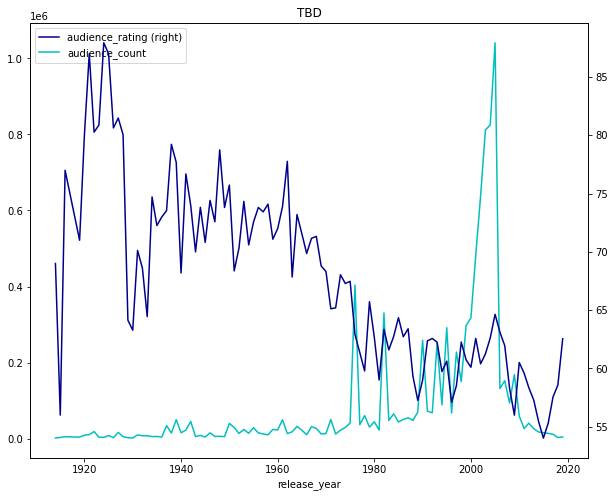

In [40]:
md_year_mean[['audience_rating', 'audience_count']].plot(title = 'TBD',color=('DarkBlue','c'),figsize=(10, 8),secondary_y=['audience_rating']);

 In this graph we see that audience ratings average is decreasing over the years while the vote count is rising constantly. So more people rate but in general movies are getting worse?! Or people seem to like movies less...

### Q7. how many genres category we have ?

In [41]:
# Lets turn to genres, reminder of what the split looked like
md_split_genres.head()

,movie_title,rating,in_theaters_date,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,genre,release_year,release_month
0,Percy Jackson & the Olympians: The Lightning T...,PG,12-02-2010,20th Century Fox,Rotten,49,144,53.0,254287.0,Action & Adventure,2010,12
0,Percy Jackson & the Olympians: The Lightning T...,PG,12-02-2010,20th Century Fox,Rotten,49,144,53.0,254287.0,Comedy,2010,12
0,Percy Jackson & the Olympians: The Lightning T...,PG,12-02-2010,20th Century Fox,Rotten,49,144,53.0,254287.0,Drama,2010,12
0,Percy Jackson & the Olympians: The Lightning T...,PG,12-02-2010,20th Century Fox,Rotten,49,144,53.0,254287.0,Science Fiction & Fantasy,2010,12
1,Please Give,R,30-04-2010,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,Comedy,2010,4


In [42]:
# How many different genres do we have?
md_split_genres['genre'].unique()

array(['Action & Adventure', 'Comedy', 'Drama',
       'Science Fiction & Fantasy', 'Romance', 'Classics',
       'Kids & Family', 'Mystery & Suspense', 'Western',
       'Art House & International', 'Horror', 'Faith & Spirituality',
       'Animation', 'Documentary', 'Special Interest', 'Sports & Fitness',
       'Musical & Performing Arts', 'Television', 'Cult Movies',
       'Anime & Manga', 'Gay & Lesbian'], dtype=object)

In [43]:
len(md_split_genres['genre'].unique())

21

Overall, we have movies from 21 unique genres.

### Q8. Which genres are the most common (number of movies made)?

In [44]:
# Group movies by genre using title as unique identifier and display all genres.
md_genre = (pd.DataFrame(md_split_genres.groupby('genre').movie_title.nunique())).sort_values('movie_title', ascending=False)
md_genre.head(21)

,movie_title
genre,
Drama,8311
Comedy,4997
Action & Adventure,3117
Mystery & Suspense,3061
Art House & International,2196
Romance,1711
Documentary,1673
Horror,1659
Science Fiction & Fantasy,1612


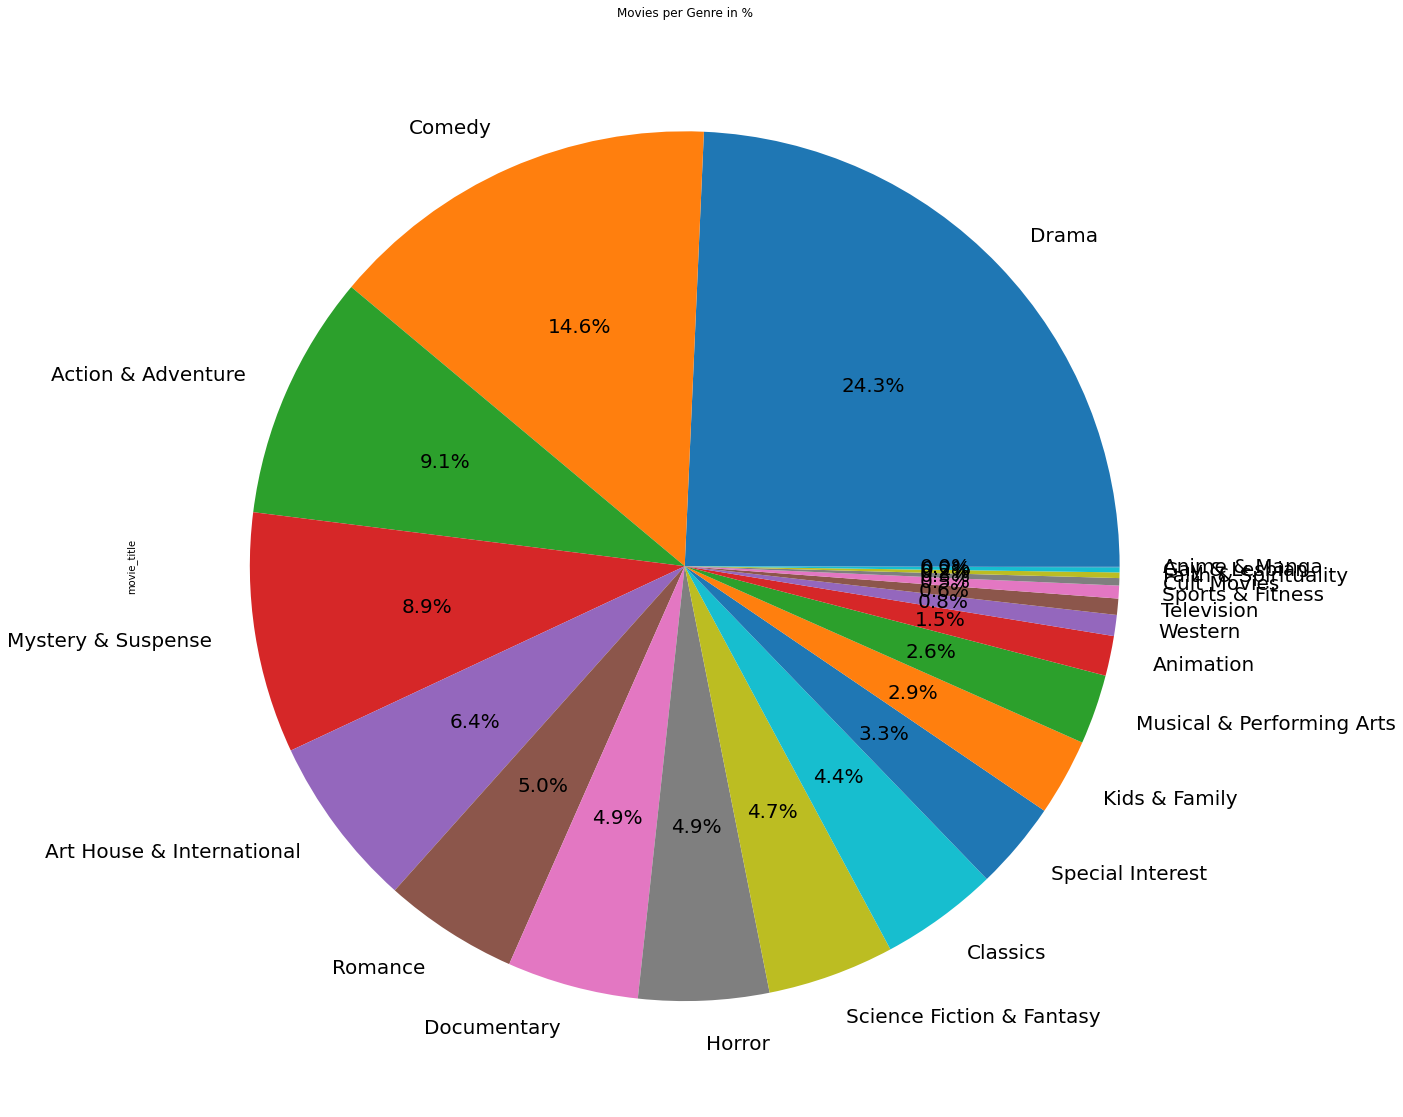

In [45]:
md_genre['movie_title'].plot.pie(title= 'Movies per Genre in %', figsize=(20,20), autopct='%1.1f%%',fontsize=20);

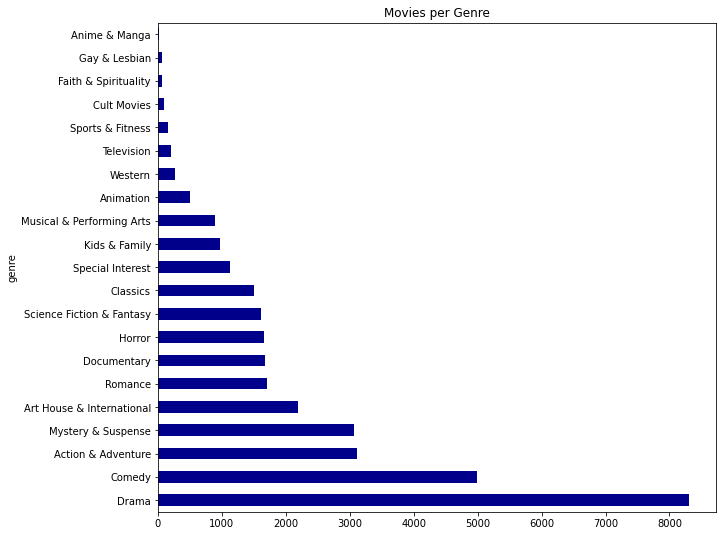

In [46]:
# Display in bar chart
md_genre['movie_title'].plot.barh(title = 'Movies per Genre',color='DarkBlue', figsize=(10, 9));

The most common genres are Drama (8311 movies, 24.3%) , Comedy (4997 movies, 14.6%) and Action & Adventure (3117 movies, 9.1%).

### Q9. Which genres have high audience voting?

In [47]:
md_genre_mean.head()

,tomatometer_rating,tomatometer_count,audience_rating,audience_count
genre,,,,
Action & Adventure,53.913452,75.112261,57.962684,282091.856068
Animation,62.495108,85.888454,64.829746,334388.759295
Anime & Manga,70.857143,33.857143,74.428571,19194.357143
Art House & International,70.954133,42.445504,67.213442,9732.165304
Classics,79.423382,22.517173,71.525760,88489.638705


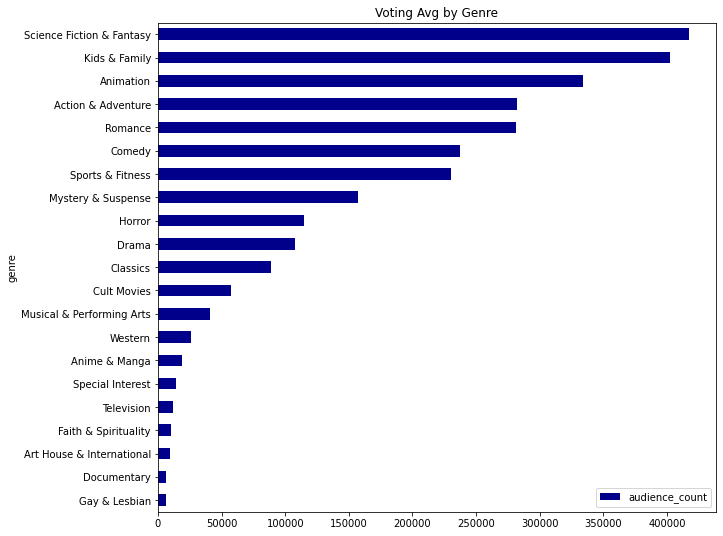

In [48]:
md_genre_mean.sort_values('audience_count', ascending=True, inplace = True)
md_genre_mean[['audience_count']].plot.barh(stacked=True, title = 'Voting Avg by Genre',color='DarkBlue', figsize=(10, 9));


'Science Fiction & Fantasy', 'Kids & Family' and 'Animation' have the hightest voting avg. Then comes 'Action & Adventure'.

### Q10. Which genres have high number of movies with an voting avg. >=80?

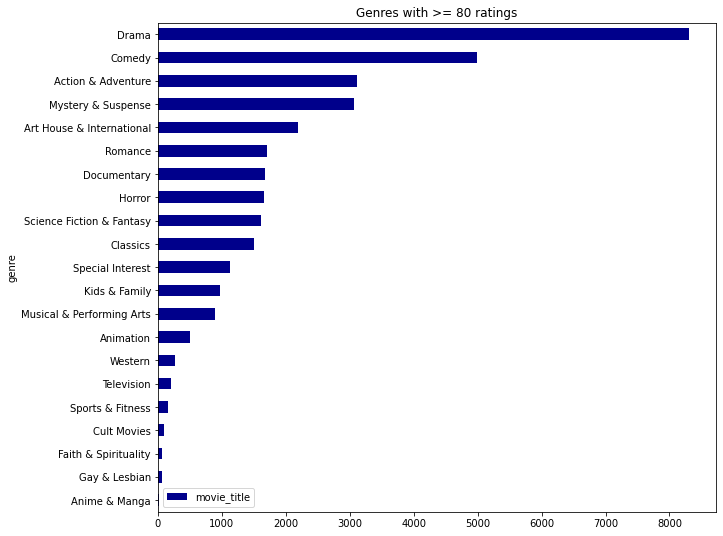

In [49]:
md_8 = md_split_genres[md_split_genres['audience_rating']>=80]
md_8 = (pd.DataFrame(md_split_genres.groupby('genre').movie_title.nunique())).sort_values('movie_title', ascending=True )
md_8[['movie_title']].plot.barh(stacked=True, title = 'Genres with >= 80 ratings', figsize=(10, 9),color='DarkBlue');

The genre drama has the most movies with a rating of at least 80.

### Q11. Compare average Tomatometer ratings by Studio. Which studios produce the highest rated films, on average? The lowest?

In [50]:
dfMovies['studio_name'].value_counts()

Paramount Pictures         493
Warner Bros. Pictures      486
Universal Pictures         463
20th Century Fox           414
IFC Films                  394
                          ... 
Archangel Entertainment      1
Island                       1
Dharma Productions           1
Momentum Picutres            1
Inferno Entertainment        1
Name: studio_name, Length: 2656, dtype: int64

In [51]:
# Get mean of variables grouped by year (new data frame) in order to see what changed
md_studio = dfMovies.groupby('studio_name').mean()

In [52]:
md_studio.nlargest(3, 'tomatometer_rating').sort_values('tomatometer_rating', ascending=False)

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
studio_name,,,,,
20th Century Fox Television,88.0,100.0,9.0,80.0,28510.0
Acme DVD Works,95.0,100.0,14.0,88.0,3667.0
Alive Mind,104.0,100.0,7.0,70.0,317.0


In [53]:
md_studio.sort_values('tomatometer_rating', ascending=True).head(3)

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
studio_name,,,,,
Podium Pictures,90.0,0.0,8.0,40.0,167.0
Gold Lion China,116.0,0.0,5.0,29.0,350.0
Sonar Entertainment,102.0,0.0,5.0,46.0,172.0


we can see that '20th Century Fox Television' Studio have highest rated films by Tomatometer ratings and 'Podium Pictures' Studio have lowest rated films by Tomatometer ratings

### Q12. Compare the Tomatometer ratings against audience ratings. Which films showed the largest discrepancies between audiences and critics?

In [54]:
dfMovies['Rating_diff']= dfMovies['tomatometer_rating']-dfMovies['audience_rating']

In [55]:
dfMovies.nlargest(3, 'Rating_diff')

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Rating_diff
10874,Outside the Law,A woman starting a new life discovers her old ...,NaN,R,"Action & Adventure, Television",Jorge Montesi,Rob Gilmer,"Cynthia Rothrock, Seamus Dever, Dan Lauria, Ja...",01-03-2001,25-06-2002,100.0,Sony Pictures Home Entertainment,Fresh,86,7,0.0,87.0,86.0
5808,Everybody Knows... Elizabeth Murray,This documentary profiles painter and artist E...,NaN,NR,Documentary,Kristi Zea,NaN,"Elizabeth Murray, Meryl Streep, Douglas Baxter...",11-01-2017,24-10-2017,58.0,RubyRed Productions,Fresh,100,6,17.0,31.0,83.0
8564,Knock Down the House,When tragedy struck her family in the midst of...,A galvanizing glimpse behind the scenes of a p...,PG,Documentary,Rachel Lears,"Rachel Lears, Robin Blotnick","Alexandria Ocasio-Cortez, Amy Vilela, Cori Bus...",01-05-2019,01-05-2019,86.0,Netflix,Certified Fresh,100,86,17.0,2686.0,83.0


we can see that 'Outside the Law' movie have largest discrepancies between  Tomatometer ratings against audience ratings.

In [56]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Inferences and Conclusion

- Analysis of the movie dataset shows that the most popular movie was ‘Titanic’, ’The Lord of the Rings: The Return of the King’ & ‘Spider-Man’.
- Over a period of time, more and more movies were released in treaters per year. a max of 728 movies released in 2014.
- The majority of movies were released in January month. 
- The majority of movies were rated in the Restricted category as compared to the General category
- 19% of films received a Certified Fresh Tomatometer rating and  44.1%  are consider Rotten.
- The audience rating average is decreasing over the years while the vote count is rising constantly. So more people rate but in general movies are getting worse?! Or people seem to like movies less...
- Overall, we have movies from 21 unique genres, The most common genres are Drama (8311 movies, 24.3%) , Comedy (4997 movies, 14.6%) and Action & Adventure (3117 movies, 9.1%).
- 'Science Fiction & Fantasy', 'Kids & Family' and 'Animation' have the highest voting avg. Then comes 'Action & Adventure'.
- The genre drama has the most movies with a rating of at least 80.
- we can see that '20th Century Fox Television' Studio have the highest-rated films by Tomatometer ratings 

Now it's time for you to perform further analysis and unveil many more insights.



## References and Future Work

1. https://www.mavenanalytics.io/data-playground
2. https://stackoverflow.com/questions/38337918/plot-pie-chart-and-table-of-pandas-dataframe 
3. https://pandas.pydata.org/pandas-docs/stable/reshaping.html 
4. https://github.com/pandas-dev/pandas/issues/11076 
5. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 
6. https://pandas.pydata.org/pandas-docs/stable/visualization.html 
7. https://www.kaggle.com/lorenzhering/movie-data-analysis/notebook
8. https://www.kaggle.com/rdrubbel/tmdb-analysis 
9. https://github.com/AjaSharma93/TMDB-Data-Analysis/blob/master/TMDB_Report.ipynb  
10. https://github.com/nirupamaprv/Investigate_Dataset/blob/master/Investigate_a_Dataset_TMDb.ipynb 
11. https://github.com/abhishekchhibber/IMDB_Dataset_Analysis/blob/master/imdb_db_analysis_abhishek_chhibber.ipynb


In [ ]:
import jovian

In [ ]:
jovian.commit()